dataset_tr =torch.utils.data.DataLoader
dataloader_tr = torch.utils.data.DataLoader(dataset_tr, bach_size=50)
for epoch in tange(epochs)
    for image, label in loader_tr:
        train(image, label)



In [1]:
import torch
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader
import numpy as np
import math
import matplotlib.pyplot as plt

#   CLASE DATASET  ###############

class x(Dataset):

    def __init__(self):
        xy = np.loadtxt('path-to-data', delimiter=',', dtype=np.float32, skiprows=1)
        self.n_samples = xy.shape[0]

        # [Etiqueta de clase, Features]
        self.x_data = torch.from_numpy(xy[:, 1:]) # size [n_samples, n_features]
        self.y_data = torch.from_numpy(xy[:, [0]]) # size [n_samples, 1]

    # Obtener la muestra i-th (index)
    def __getitem__(self, index):
        return self.x_data[index], self.y_data[index]

    # Longitud de datos
    def __len__(self):
        return self.n_samples

# Tarea de clase:

Rellena las celdas del notebook para un dataset concreto (https://pytorch.org/vision/stable/datasets.html) Image classification, con parámetro "download":

    1. Crear una instancia dataset para train y otra para test.
    2. Crear ambos cargadores de datos.
    3. Muestra las dimensiones del dato 525 y su etiqueta.
    4. Muestra la banda R matplotlib.
    5. Muestra la imagen con matplotlib.
    6. Calcular el valor promedio de cada dato.
    7. Aplica random crop a un tamaño 40% inferior al actual y repite el proceso. ¿Sale la misma Media?¿El tamaño del dataset ha variado?¿Por qué?

### 1 Crear una instancia dataset para train y otra para test.

In [2]:

transform=torchvision.transforms.ToTensor()
print(torchvision.__version__)

#cargamos los dataset
train_dataset = datasets.CIFAR10('./tmp/data', train=True, download=True, transform=transform)
test_dataset = datasets.CIFAR10('./tmp/data', train=False, transform=transform)




0.13.1+cu102
Files already downloaded and verified


## 2 Crear ambos cargadores de datos.

In [3]:


batch_size = 50
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

## 3 Muestra las dimensiones del dato 525 y su etiqueta.

In [4]:

print("dimensiones",train_dataset.data[525].shape)
print("La etiqueta de la imagen es ", train_dataset.classes[train_dataset.targets[525]], "teniendo ", len(train_dataset.classes), "posibilidades")



dimensiones (32, 32, 3)
La etiqueta de la imagen es  frog teniendo  10 posibilidades


## 4 Muestra la banda R matplotlib.

array([[ 88, 123, 122, ...,  42,  51,  53],
       [ 85, 113, 116, ...,  56,  74,  97],
       [ 88, 109, 116, ...,  81,  96, 123],
       ...,
       [ 46,  68,  72, ..., 141, 120, 107],
       [ 28,  61,  75, ..., 117, 109, 111],
       [ 15,  24,  44, ..., 107, 116, 134]], dtype=uint8)

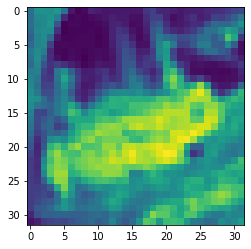

In [5]:

#mostramos la matriz
display(train_dataset.data[525][:,:,0])
#mostramos la imagen 
plt.imshow(train_dataset.data[525][:,:,0])
plt.show()


 ## 5 Muestra la imagen con matplotlib.

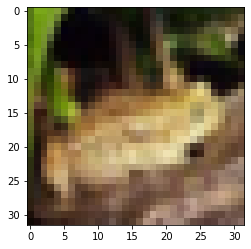

In [6]:

plt.imshow(train_dataset.data[525])
plt.show()

## 6 Calcular el valor promedio de cada dato.

In [7]:

mean = []
for img, label in train_loader:
    #media del bach
    m = torch.mean(img)
    print("media del bach es ", m)
    #añadimos para media de medias
    mean.append(m)
    
print("La media de todas las imágenes son: ", np.mean(mean))


media del bach es  tensor(0.4663)
media del bach es  tensor(0.4621)
media del bach es  tensor(0.4849)
media del bach es  tensor(0.4694)
media del bach es  tensor(0.4652)
media del bach es  tensor(0.4806)
media del bach es  tensor(0.4826)
media del bach es  tensor(0.4805)
media del bach es  tensor(0.4794)
media del bach es  tensor(0.4900)
media del bach es  tensor(0.4518)
media del bach es  tensor(0.4543)
media del bach es  tensor(0.4587)
media del bach es  tensor(0.4764)
media del bach es  tensor(0.4477)
media del bach es  tensor(0.4612)
media del bach es  tensor(0.4811)
media del bach es  tensor(0.4758)
media del bach es  tensor(0.5008)
media del bach es  tensor(0.4737)
media del bach es  tensor(0.4583)
media del bach es  tensor(0.4503)
media del bach es  tensor(0.4524)
media del bach es  tensor(0.4904)
media del bach es  tensor(0.4567)
media del bach es  tensor(0.4692)
media del bach es  tensor(0.4811)
media del bach es  tensor(0.4514)
media del bach es  tensor(0.4664)
media del bach

## 7 Aplica random crop a un tamaño 40% inferior al actual y repite el proceso. ¿Sale la misma Media?¿El tamaño del dataset ha variado?¿Por qué?

In [8]:

#torchvision.transforms.RandomCrop(size=32*0.6, padding=None, pad_if_needed=False, fill=0, padding_mode='constant')
#instación de  la trasformacion
Crop = torchvision.transforms.RandomCrop(size=int(32*0.6))
mean = []
for img, label in train_loader:
    #media del bach
    m = torch.mean(Crop(img))
    print("media del bach es ", m)
    #añadimos para la media de medias
    mean.append(m)
print("La media de todas las imágenes son: ", np.mean(mean))


media del bach es  tensor(0.4405)
media del bach es  tensor(0.4499)
media del bach es  tensor(0.4453)
media del bach es  tensor(0.5035)
media del bach es  tensor(0.4595)
media del bach es  tensor(0.4846)
media del bach es  tensor(0.4469)
media del bach es  tensor(0.4732)
media del bach es  tensor(0.4473)
media del bach es  tensor(0.4703)
media del bach es  tensor(0.4492)
media del bach es  tensor(0.4186)
media del bach es  tensor(0.4499)
media del bach es  tensor(0.4635)
media del bach es  tensor(0.4429)
media del bach es  tensor(0.4702)
media del bach es  tensor(0.4434)
media del bach es  tensor(0.4591)
media del bach es  tensor(0.4398)
media del bach es  tensor(0.4329)
media del bach es  tensor(0.4631)
media del bach es  tensor(0.4196)
media del bach es  tensor(0.4664)
media del bach es  tensor(0.4750)
media del bach es  tensor(0.4603)
media del bach es  tensor(0.4770)
media del bach es  tensor(0.4447)
media del bach es  tensor(0.4687)
media del bach es  tensor(0.4545)
media del bach

In [9]:
# Metodo desde 0 
##Instación de  la trasformacion del crop y de tensor
transform2 = transforms.Compose([
    transforms.RandomCrop(size=int(32*0.6)),
    transforms.ToTensor()])

#Cargamos con los ajustes antes descritos
train_dataset2 = datasets.CIFAR10('./tmp/data', train=True, download=True, transform=transform2)
test_dataset2 = datasets.CIFAR10('./tmp/data', train=False, transform=transform2)

#Creamos los loader
batch_size = 50
train_loader2 = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader2 = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)


mean =[]
for img, label in train_loader2:
    #Media del bach
    m = torch.mean(Crop(img))
    print("media del bach es ", m)
    #añadimos para la media de medias
    mean.append(m)
print("La media de todas las imágenes son: ", np.mean(mean))


Files already downloaded and verified
media del bach es  tensor(0.4562)
media del bach es  tensor(0.4545)
media del bach es  tensor(0.4906)
media del bach es  tensor(0.4943)
media del bach es  tensor(0.4547)
media del bach es  tensor(0.4363)
media del bach es  tensor(0.4697)
media del bach es  tensor(0.4678)
media del bach es  tensor(0.4430)
media del bach es  tensor(0.4902)
media del bach es  tensor(0.4429)
media del bach es  tensor(0.4467)
media del bach es  tensor(0.4479)
media del bach es  tensor(0.4546)
media del bach es  tensor(0.4544)
media del bach es  tensor(0.4645)
media del bach es  tensor(0.4547)
media del bach es  tensor(0.4633)
media del bach es  tensor(0.4588)
media del bach es  tensor(0.4735)
media del bach es  tensor(0.4230)
media del bach es  tensor(0.4594)
media del bach es  tensor(0.4190)
media del bach es  tensor(0.4569)
media del bach es  tensor(0.4570)
media del bach es  tensor(0.4700)
media del bach es  tensor(0.4421)
media del bach es  tensor(0.4643)
media del 

#### Comentario ejercicio 7
No sale la misma media, ya que se esta modificando el dataset con cortes del 60% de tamaño de las imágenes, aunque sea cercana ya que sigue teniendo los mismos datos aunque en menor cantidad, los que se han recortado.

In [10]:
# bucle sobre dataloader (MNIST tiene 60k samples para training y 10k samples para test)

num_epochs = 1
total_train_samples = len(train_loader.dataset)
total_test_samples  = len(test_loader.dataset)
print(total_train_samples, total_test_samples)
for epoch in range(num_epochs):
    for i, (inputs, labels) in enumerate(train_loader):
            print(f'Epoch: {epoch+1}/{num_epochs}, Step {i}| Inputs {inputs.shape} | Labels {labels.shape}')

50000 10000
Epoch: 1/1, Step 0| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 1| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 2| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 3| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 4| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 5| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 6| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 7| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 8| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 9| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 10| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, Step 11| Inputs torch.Size([50, 3, 32, 32]) | Labels torch.Size([50])
Epoch: 1/1, St